In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
books=pd.read_csv('data/Books.csv')
users=pd.read_csv('data/Users.csv')
ratings=pd.read_csv('data/Ratings.csv')

In [7]:
books['Image-URL-M'][1] # M -------> Medium size image of book

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [8]:
books.sample(n=1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
156986,0807068691,Poems to Live By : In Uncertain Times,Joan Murray,2001,Beacon Press,http://images.amazon.com/images/P/0807068691.0...,http://images.amazon.com/images/P/0807068691.0...,http://images.amazon.com/images/P/0807068691.0...


In [9]:
users.sample(n=1)

,User-ID,Location,Age
83990,83991,"roma, n/a, italy",NaN


In [10]:
ratings.sample(n=1)

,User-ID,ISBN,Book-Rating
165996,36606,0618012672,0


In [11]:
print("Shape of Users = {}".format(users.shape))
print("Shape of Books = {}".format(books.shape))
print("Shape of Ratings = {}".format(ratings.shape))

Shape of Users = (278858, 3)
Shape of Books = (271360, 8)
Shape of Ratings = (1149780, 3)


# HANDLING MISSING VALUES

In [12]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
users.isna().sum() #Age is not important in our model

User-ID          0
Location         0
Age         110762
dtype: int64

In [14]:
(~ratings.notna()).sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# Converting to integer As well as Handling the "Year of Publication " feature as it contains some non numeric values.

In [15]:
books["Year-Of-Publication"].value_counts().index[pd.to_numeric(books["Year-Of-Publication"].value_counts().index,errors='coerce',downcast='integer').isna()]#[(pd.to_numeric(books["Year-Of-Publication"].value_counts(),errors='coerce').isnull())]

Index(['DK Publishing Inc', 'Gallimard'], dtype='object', name='Year-Of-Publication')

In [17]:
books["Year-Of-Publication"].value_counts()[(books["Year-Of-Publication"].value_counts().index == 'Gallimard') | (books["Year-Of-Publication"].value_counts().index == 'DK Publishing Inc')]#in ['DK Publishing Inc','Gallimard']

Year-Of-Publication
DK Publishing Inc    2
Gallimard            1
Name: count, dtype: int64

In [19]:
books["Year-Of-Publication"]=(pd.to_numeric(books["Year-Of-Publication"],errors='coerce',downcast='integer'))

In [20]:
# Data is missing at Random
books.dropna(axis=0,inplace=True)

In [21]:
books["Year-Of-Publication"]=books["Year-Of-Publication"].astype(int)

In [22]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

# Detecting Te Duplicates

In [23]:
books.duplicated().sum()

0

In [24]:
ratings.duplicated().sum()

0

In [25]:
users.duplicated().sum()

0

# We can see that there are no duplicate data points.

In [26]:
ratings["Book-Rating"].value_counts().sort_index(ascending=True)

Book-Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64

In [27]:
books["Year-Of-Publication"].value_counts().sort_index(ascending=False)

Year-Of-Publication
2050       2
2038       1
2037       1
2030       7
2026       1
        ... 
1897       1
1806       1
1378       1
1376       1
0       4618
Name: count, Length: 116, dtype: int64

#Outlier Detection

In [29]:
books["Year-Of-Publication"].value_counts()[books["Year-Of-Publication"].value_counts().index<(pd.Series(books["Year-Of-Publication"].value_counts().index).quantile(0.25))].sort_index()

Year-Of-Publication
0       4618
1376       1
1378       1
1806       1
1897       1
1900       3
1901       7
1902       2
1904       1
1906       1
1908       1
1909       2
1910       1
1911      19
1914       1
1917       1
1919       1
1920      33
1921       2
1922       2
1923      11
1924       2
1925       2
1926       2
1927       2
1928       2
1929       7
1930      13
1931       3
Name: count, dtype: int64

<Axes: xlabel='Year-Of-Publication', ylabel='Count'>

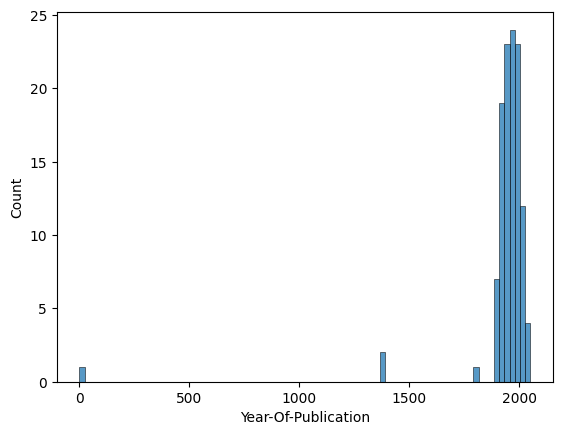

In [30]:
sns.histplot(pd.Series(books["Year-Of-Publication"].value_counts().index))

#Therefore dropping these outliers i.e. using a imputer 

In [32]:
books["Year-Of-Publication"].replace({0:np.NaN},inplace=True)

In [33]:
books.loc[books["Year-Of-Publication"].isna(),"Year-Of-Publication"]=books["Year-Of-Publication"].dropna().sample(n=books["Year-Of-Publication"].isna().sum()).values

In [34]:
books["Year-Of-Publication"].isna().sum()

0

In [35]:
books["Year-Of-Publication"]=books["Year-Of-Publication"].astype(int)

<Axes: xlabel='Year-Of-Publication', ylabel='Count'>

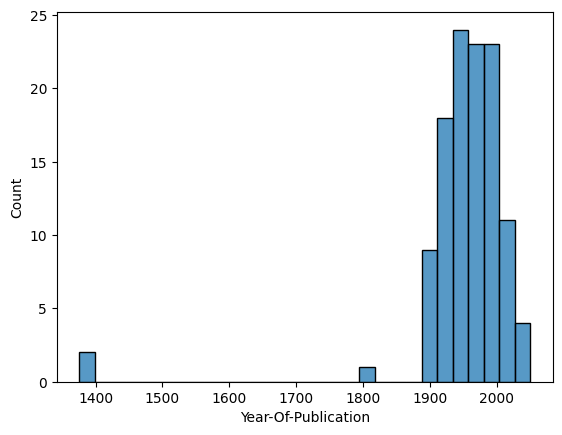

In [36]:
sns.histplot(pd.Series(books["Year-Of-Publication"].value_counts().index))

# Here I had done  Random imputation to replace the outliers.

# POPULARITY BASED RECOMMENDATION

In [ ]:
ratings_with_name=ratings.merge(books,on="ISBN")

In [ ]:
No_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
No_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
No_rating_df.sample(n=2)

In [ ]:
mean_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
mean_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
mean_rating_df.sample(n=2)

In [ ]:
lst=np.array(No_rating_df.sort_values(by='num_ratings',ascending=False)['num_ratings'].index)[0:10]

In [ ]:
plt.barh(No_rating_df.loc[lst,'Book-Title'],No_rating_df.loc[lst,"num_ratings"])

In [ ]:
lst_1=np.array(mean_rating_df.sort_values(by='avg_rating',ascending=False)['avg_rating'].index)[0:10]

In [ ]:
plt.barh(mean_rating_df.loc[lst_1,'Book-Title'],mean_rating_df.loc[lst_1,"avg_rating"])

In [ ]:
merged_df_popularity=No_rating_df.merge(mean_rating_df,on='Book-Title')

In [ ]:
def find_recommendations():
    mi=0.9991
    ma=0
    for i in range(6):
        mi=np.round(mi,4)
        print("Ratings = {} \nwhere quantile value = {}".format(merged_df_popularity["num_ratings"].quantile(mi),mi))
        no_of_books=len(merged_df_popularity[merged_df_popularity["num_ratings"]>=merged_df_popularity["num_ratings"].quantile(mi)])
        print("Number  of Popular recommendations = {}".format(no_of_books))
        print("\n")
        if(no_of_books>=100):
            ma=mi     
        mi+=0.0001
    print("ma = {}".format(ma))
    ma+=0.00009
    print("\n")
    ans=0
    n_recommendations=0
    rating_val=0
    for i in range(9):
        ma=np.round(ma,5)
        print("Ratings = {} \nwhere quantile value = {}".format(merged_df_popularity["num_ratings"].quantile(ma),ma))
        no_of_recommendations=len(merged_df_popularity[merged_df_popularity["num_ratings"]>=int(merged_df_popularity["num_ratings"].quantile(ma))])
        print("Number  of Popular recommendations = {}".format(no_of_recommendations))
        if(no_of_recommendations<=100):
            n_recommendations=no_of_recommendations
            rating_val=int(merged_df_popularity["num_ratings"].quantile(ma))
            ans=ma
        print("\n")
        ma-=0.00001
        
    return ans,rating_val,n_recommendations    

In [ ]:
percentile_val,rating,no_of_recommendations=find_recommendations()

In [ ]:
rating#==int(merged_df_popularity["num_ratings"].quantile(percentile_val))

In [ ]:
tem=merged_df_popularity[merged_df_popularity["num_ratings"]>=rating].sort_values(by=['avg_rating','num_ratings'],ascending=False)

In [ ]:
tem.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','num_ratings','avg_rating','Image-URL-M']]

In [ ]:
popular_df=tem.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','num_ratings','avg_rating','Image-URL-M']]

#COLLABORATIVE FILTERING

In [ ]:
q_val=0.988
dictionary={}
for i in range(10):
    num_users=int(ratings_with_name.groupby('User-ID').count().rename(columns={'Book-Rating':"count"})['count'].quantile(q_val))
    if(((num_users>=150)&(num_users<=250))):
        dictionary[q_val]=num_users
    q_val+=0.001

In [ ]:
lst_3=[]
for i,j in dictionary.items():
    t=ratings_with_name.groupby('User-ID').count()['Book-Rating']>=j
    #print(j)
    #print(len(t[t]))
    lst_3.append(len(t[t]))
print(lst_3)

In [ ]:
np.ceil(np.mean(list(dictionary.values())))

In [ ]:
def good_readers(df,review_count):
    x=df.groupby('User-ID').count().rename(columns={'Book-Rating':'count'})['count']>=review_count
    print("Number of good book readers i.e who atleast gave {} reviews = {}".format(review_count,len(x[x])))
    return x[x].index

In [ ]:
x=good_readers(ratings_with_name,193)

In [ ]:
x_1=good_readers(ratings_with_name,197)

In [ ]:
x_2=good_readers(ratings_with_name,200)

In [ ]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(x_2)]

In [ ]:
filtered_rating_1=ratings_with_name[ratings_with_name['User-ID'].isin(x_1)]

In [ ]:
filtered_rating_2=ratings_with_name[ratings_with_name['User-ID'].isin(x)]

In [ ]:
def min_reviews_per_book(df):
    score_dict={}
    s_val=0.995
    for i in range(10): # Minimum No Of Ratings Per Book
        s_val=np.round(s_val,4)
        num=df.groupby('Book-Title').count().rename(columns={'Book-Rating':"count"})['count'].quantile(s_val)
        score_dict[s_val]=np.ceil(num)
        s_val+=0.0001
    score_lst=[]
    for i,j in score_dict.items(): #Number Of Such Books
        y=df.groupby('Book-Title').count().rename(columns={'Book-Rating':"count"})['count']>j
        #print(j)
        #print(len(y[y]))
        score_lst.append(len(y[y]))
    print(score_lst)
    print("\n")
    print("Average Number of Books =",end=" ")
    print(np.mean(score_lst))
    return score_dict,score_lst

In [ ]:
d,l=min_reviews_per_book(filtered_rating_2) # ------->[User-Id]= x
print(d)
print("\n")
val=np.ceil(np.mean(list(d.values()))) #
print("Minimum Number of reviews per Book = {}".format(val))

In [ ]:
#d_1,l_1=min_reviews_per_book(filtered_rating_1)
#print(d_1)
#print("Minimum Number of reviews per Book = {}".format(np.ceil(np.mean(list(d_1.values())))))

#[747, 747, 747, 714, 714, 693, 668, 668, 643, 617]

#Average Number of Books = 695.8
#{0.995: 48.0, 0.9951: 48.0, 0.9952: 48.0, 0.9953: 49.0, 0.9954: 49.0, 0.9955: 50.0, 0.9956: 51.0, 0.9957: 51.0, 0.9958: 52.0, 0.9959: 53.0}
#Minimum Number of reviews per Book = 50.0

In [ ]:
#d_2,l_2=min_reviews_per_book(filtered_rating)
#print(d_2)
#print("Minimum Number of reviews per Book = {}".format(np.ceil(np.mean(list(d_2.values())))))

#[773, 736, 736, 707, 707, 683, 683, 660, 637, 637]

#Average Number of Books = 695.9
#{0.995: 47.0, 0.9951: 48.0, 0.9952: 48.0, 0.9953: 49.0, 0.9954: 49.0, 0.9955: 50.0, 0.9956: 50.0, 0.9957: 51.0, 0.9958: 52.0, 0.9959: 52.0}
#Minimum Number of reviews per Book = 50.0

In [ ]:
def famous_books_list(df,value):
    y=df.groupby('Book-Title').count().rename(columns={'Book-Rating':'count'})['count']>value
    print("Number Of Books having Atleast {} Reviews per Book = {} ".format(int(value),len(y[y])))
    return y[y].index

In [ ]:
famous_books=famous_books_list(filtered_rating_2,val)

In [ ]:
final_ratings=filtered_rating_2[filtered_rating_2['Book-Title'].isin(famous_books)]

In [ ]:
final_ratings

In [ ]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores=cosine_similarity(pt)

In [ ]:
similarity_scores.shape

In [ ]:
def recommend_book(book_name):
    book_index=np.where(pt.index==book_name)[0][0] #------------>returning a 2-D array
    distances=similarity_scores[book_index]
    similar_books=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    
    data=[]
    for i in similar_books:
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')["Book-Title"].values)) 
        item.extend(list(temp_df.drop_duplicates('Book-Title')["Book-Author"].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')["Image-URL-M"].values))
        
        data.append(item)
        
    return data

In [ ]:
recommend_book("1984")

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))

In [ ]:
pickle.dump(books,open('books.pkl','wb'))

In [ ]:
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [ ]:
books['Image-URL-M'] = books['Image-URL-M'].str.replace('http://', 'https://') #( books is the dataframe name)

# COLLABORATIVE FILTERING USING CLUSTERING

In [ ]:
#import pickle

In [ ]:
#new_pt=pickle.load(open('pt.pkl','rb'))

In [ ]:
#from scipy.sparse import csr_matrix

In [ ]:
#book_sparse=csr_matrix(new_pt)

In [ ]:
#book_sparse

In [ ]:
#from sklearn.neighbors import NearestNeighbors

In [ ]:
#tt=[] #cannot use tree with sparse input: using brute force
#n_array=np.array(np.arange(3,11,1))
#for i in n_array:
#    model=NearestNeighbors(algorithm='brute',n_neighbors=i)
#    model.fit(book_sparse)
#   distances,suggestions=model.kneighbors(new_pt.iloc[237,:].values.reshape(1,-1),n_neighbors=i)
#    tt.append(distances.mean())
#    print("{} neighbors = {}".format(i,distances.mean()))

In [ ]:
#np.mean(tt) #---------> 6 neighbors is performing better.

In [ ]:
#distances,suggestions=model.kneighbors(new_pt.iloc[237,:].values.reshape(1,-1),n_neighbors=6)

In [ ]:
#distances

In [ ]:
#suggestions

In [ ]:
#np.where(new_pt.index=='Deck the Halls (Holiday Classics)')[0][0]

In [ ]:
#def recommend_by_clustering(book_name): #suggestions is 2-D array ----->suggestions[0] gives the array of indices
#    book_id=np.where(new_pt.index==book_name)[0][0]
#    distances,suggestions=model.kneighbors(new_pt.iloc[book_id,:].values.reshape(1,-1),n_neighbors=7)
#    lst=[]
#    for i in suggestions[0]:
#        #print(new_pt.index[i])
#        lst.append(new_pt.index[i])
#    return lst

In [ ]:
#recommend_by_clustering('Holes (Yearling Newbery)')